In [2]:
# IPython magic to create plots within cells
%matplotlib inline

In [3]:
import seaborn as sns

In [7]:
# Load one of the data sets that come with seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


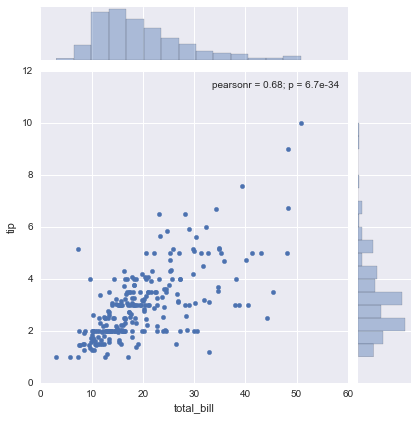

In [5]:
sns.jointplot("total_bill", "tip", tips);

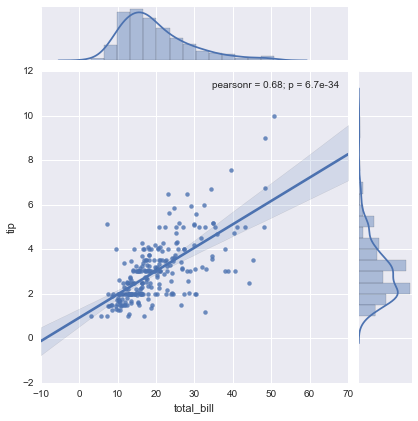

In [8]:
# X coordinate title, Y coordinate title, data to plot, kind = reg : fit a  linear regression line
sns.jointplot("total_bill", "tip", tips, kind='reg');

Works well with Pandas DataFrame

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Do smokers tip differently from non-smokers?

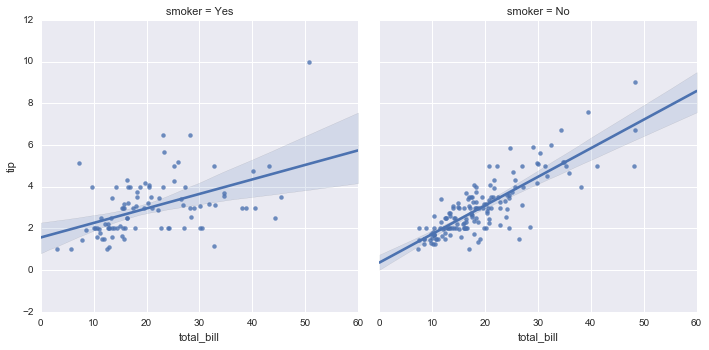

In [10]:
sns.lmplot("total_bill", "tip", tips, col="smoker");

Visualize the distribution of a data set

In [12]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
sns.set(color_codes=True)

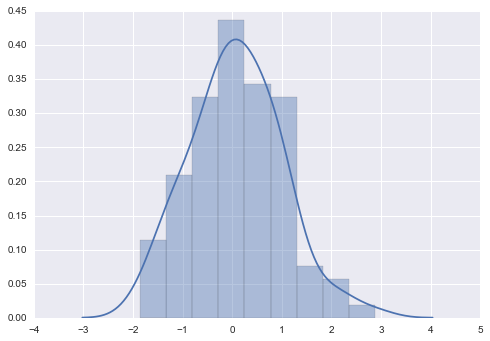

In [14]:
x = np.random.normal(size=100)
#draws a histogram and fits a KDE (kernel density estimate) on top of it
sns.distplot(x);

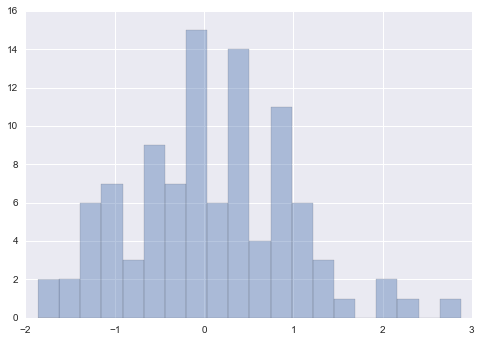

In [17]:
sns.distplot(x, bins=20, kde=False);

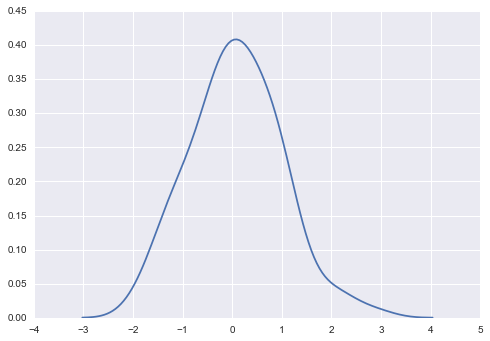

In [18]:
# only KDE
sns.distplot(x, hist=False)

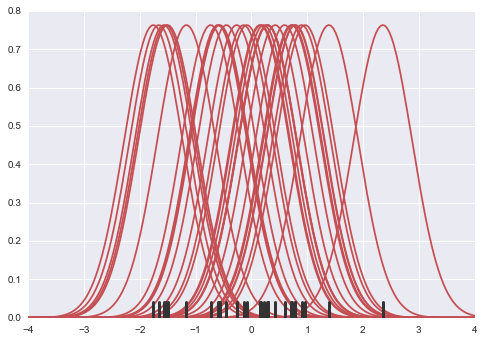

In [19]:
# drawing a KDE is more computationally expensive than drawing a hisgotram
# 1. each observation is turned into a Gaussian curve
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

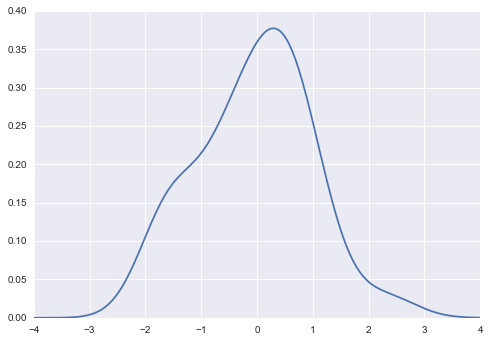

In [20]:
# 2 then these curves are summed, the resulting curvev is normalized so that the area under it equals to 1
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

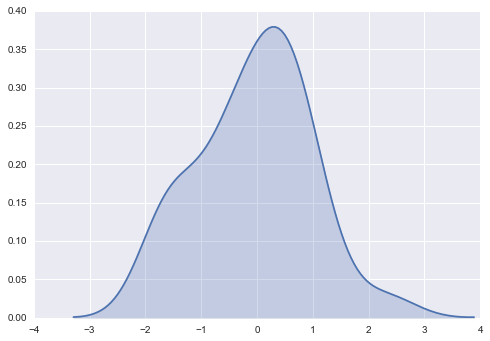

In [22]:
# let's compare
sns.kdeplot(x, shade=True);

Plotting bivariate distributions

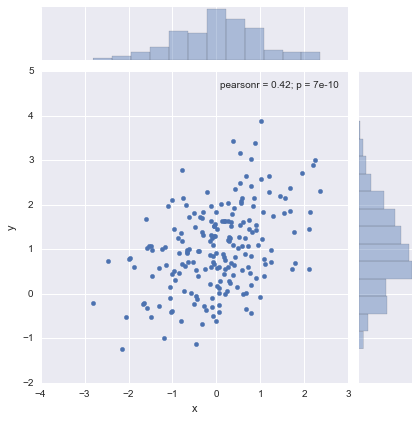

In [24]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df);